In [1]:
# To create an interactive plot
# %matplotlib notebook

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Import linear regression package
from sklearn.linear_model import LinearRegression

In [2]:
# First, lets read the data

df1 = pd.read_csv(r'DF1', sep = ',', index_col = 0)

df1.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


In [3]:
df1.describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007704,0.009313,0.007586,-0.008455
std,1.000779,1.002686,1.000794,1.002581
min,-3.471566,-4.056024,-3.524182,-3.930215
25%,-0.663449,-0.663886,-0.666489,-0.697856
50%,0.017736,0.009027,0.012372,-0.007986
75%,0.667565,0.695943,0.672933,0.668582
max,3.854101,3.908736,3.608846,3.985592


In [4]:
df1.shape

(10000, 4)

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>]], dtype=object)

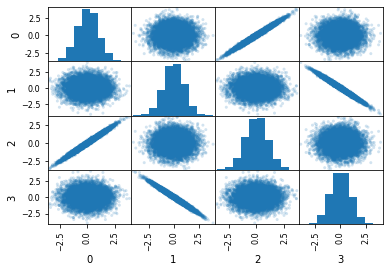

In [5]:
# Pandas Scatter Plot
pd.plotting.scatter_matrix(df1, alpha=0.2)

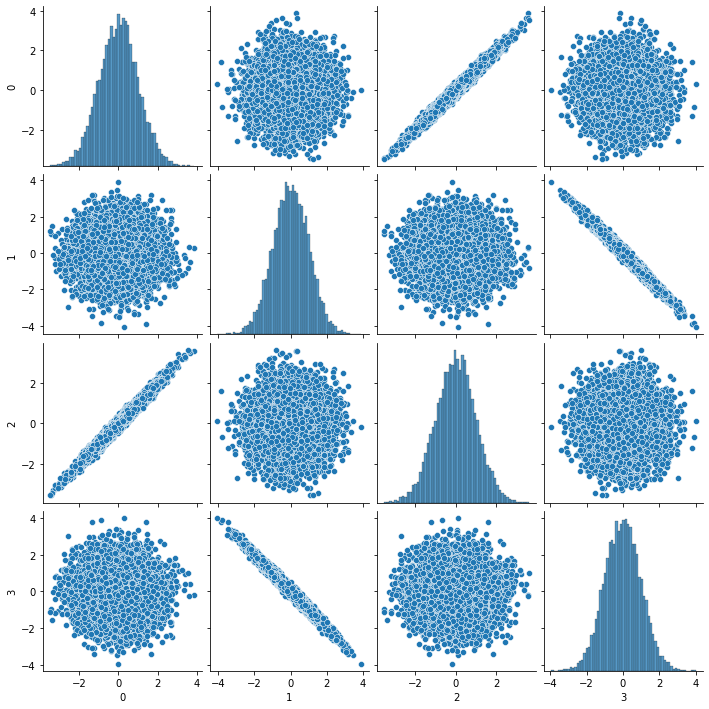

In [6]:
#seaborn
sns.pairplot(df1)

## Problem 1
<b>Answer 1: </b>The columns that are correlated are 0x2, 1x3. If we take a look in the matrix of graphs above, the following items represent:
- (0,2) Positive correlation
- (1,3) Negative correlation
- (2,0) Positive correlation
- (3,1) Negative correlation

In [7]:
## Calculate the covariance matrix by hand

In [8]:
# Get the means of each column
means = [df1.iloc[:,int(col)].mean() for col in df1.columns]
means

# Create a dataframe to store the variances and covariances
cov_mat = pd.DataFrame()
for col1 in df1.columns: # Loop through the columns twice to create the 2d covariance matrix
    var_row = []
    for col2 in df1.columns:
        # Calculate the variance/ covariance of the corresponding column pairs
        var = np.sum((df1.iloc[:, int(col1)] - means[int(col1)]) * (df1.iloc[:, int(col2)] - means[int(col2)]) ) / (len(df1)-1)
        var_row.append(var)
    cov_mat[col1] = var_row # Create the column of computed variances to data frame
cov_mat

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


In [9]:
round(df1.cov(), 2)

,0,1,2,3
0,1.00,-0.00,0.99,0.00
1,-0.00,1.01,-0.00,-1.00
2,0.99,-0.00,1.00,0.00
3,0.00,-1.00,0.00,1.01


<b>Answer 2: </b>The columns that are correlated (0x2, 1x3) have high covariances (in absolute values). Looking to the table above we can read the following:
- (0,2) Positive correlation with a value of 0.99
- (1,3) Negative correlation with a value of -1.00
- (2,0) Positive correlation
- (3,1) Negative correlation

Also note that the diagonal of course correlates with itself, so it's valued at 1.

The covariance matrix tells us the covariance between the column features. For example, the 0,1 entry showing a covariance of -0.004 is the covariance of column feature 0 and column feature 1, which has the same value as the 1,0 entry, since it is the covariance for the same both features. However, the diagonal entries are simply variances of the column feature, since the covariance of the column feature itself is its own variance.  

The covariance matrix looks suitable with our correlation plots. 

- The histogram like plots along the diagonal simply plots the column feature values in two dimension, because the paired column features are the same. The diagonal entries of the covariance matrix is simply the variance of the column feature.


- From the covariance matrix, we can spot some extremely low numbers, such as the pairs of 01, 03, 12, and 23. The covariances are -0.004, 0.004, -0.004, and 0.004 respectively. This is also consistent with our plots because the corresponding plots show scattered points, meaning small or no correlation with extremely low covariance as well. 


- For the covariance matrix entries that we see high correlations, such as pairs 02 and 13, we observe two different but obvious trends in their corresponding correlation plots. Both trends show a strong pattern between the two axis, but te 02 plot shows a positive slope and the 13 plot shows a negative slope. The slope direction matches the positive and the negative sign of the covariance matrix, both with a very high correlation in their own directions. 

Covariance Matrix 
 [[1.   0.   0.  ]
 [0.   1.   0.95]
 [0.   0.95 1.  ]]


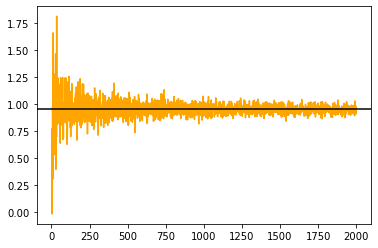

In [10]:
# Starting in reverse, create our covar matrix where only (X2,X3) are closely related (and the diagonal of course).
# I set them to .95 in this example.
covariance_matrix = [[1, 0, 0], [0, 1, 0.95], [0, 0.95, 1]]
mean = [0, 0, 0]
print('Covariance Matrix','\n' , np.array(covariance_matrix))

# Then we generate our graph.  The X value is our nth sample (remember, the higher n gets, the closer the estimated covar gets
# to the true covar.) The true covar, which should simply be .95 as we set above, is shown by the line at y=.95.
# The y values of the covar correspond to the mean over time - the first values have a wider variance, but converge towards
# the true mean of .95 as we increase the size of the data points.
covar_x = range(2,2000)
covar_y =[np.cov(np.random.multivariate_normal(mean, size = i, cov = covariance_matrix),rowvar=False)[1][2] for i in covar_x]
plt.plot(covar_x, covar_y, color='orange')
plt.axhline(0.95, 0, 2000, color='black')
plt.show()

## Problem 2

In [11]:
# First, lets read the data

df2 = pd.read_csv(r'DF2', sep = ',', index_col = 0)

df2.head()

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932


In [12]:
df2.describe()

,0,1
count,10000.000000,10000.000000
mean,0.008139,0.008169
std,1.002321,1.002078
min,-3.471566,-3.524182
25%,-0.663686,-0.666489
50%,0.017736,0.012527
75%,0.667909,0.673805
max,5.500000,5.000000


In [13]:
df2.shape

(10000, 2)

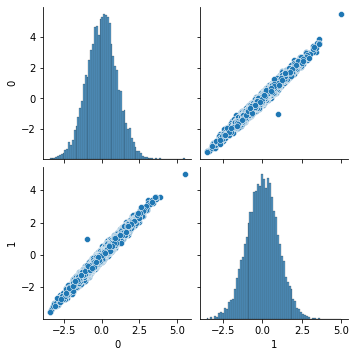

In [14]:
sns.pairplot(df2)

Although we might think that the point (5.5, 5) is more distant to the distribution compared to the (-1, 1), we could say that because that point (5.5, 5) is part of a possible extension (from the range 4 to 6 in the axis X) that point should probably be less << outlier >> than the 2nd one (-1, 1)

<b>Answer 1: </b> It seems that the point at -1, 1 is more outlying (not correlated) to the distribution than the point at 5.5, 5

In [15]:
#https://realpython.com/linear-regression-in-python/
x = np.array(df2['0']).reshape((-1, 1))
y = np.array(df2['1'])

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.979868899765168
intercept: 0.00011372407826062622
slope: [0.98964277]


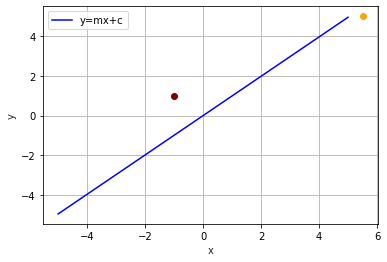

In [16]:
x = np.linspace(-5,5,100)
y = model.coef_*x+model.intercept_
plt.plot(x, y, '-r', label='y=mx+c', color='blue')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(5.5, 5, color='orange')
plt.scatter(-1, 1, color='maroon')
plt.grid()
plt.show()

In [17]:
## Plot the distance of those points from the linear regression
# ax + by + c = 0
# y = mx+c -- model.coef_*x -1y + model.intercept_ = 0
d_5_l = ( model.coef_*(5.5) - (5) + model.intercept_ ) / np.sqrt( model.coef_*model.coef_ + model.intercept_*model.intercept_ )
d_1_l = ( model.coef_*(-1) - (1) + model.intercept_ ) / np.sqrt( model.coef_*model.coef_ + model.intercept_*model.intercept_ )

print("The distance from (5.5, 5) to the line is: ", np.round(d_5_l,2))
print("The distance from (-1, 1) to the line is: ",np.round(-d_1_l,2))

The distance from (5.5, 5) to the line is:  [0.45]
The distance from (-1, 1) to the line is:  [2.01]


After calculating the actual distances from the points to the linear regression we can verify that the point (5.5, 5) is actually << less outlier >> than the point (-1, 1)

### Another way to do that is...
Through a process called data whitening.  This takes a known covariance matrix and transforms it into a new set which has a new covariance equal to its identity matrix. https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html/2

(-10.0, 10.0)

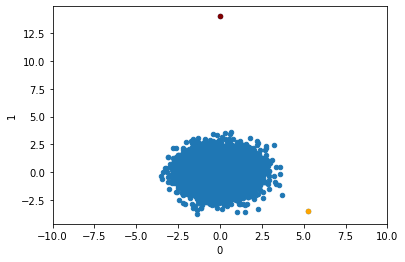

In [19]:
#First, find the covariance matrix
covar = np.cov(df2, rowvar=False)
#We can use numpy to easily find the AB values (used in the formula Σz = A*B^1/2*B^1/2*A^T), then plug them into 
#the formula for solving Q, where Σz = Q*Q^T
A,B = np.linalg.eig(covar)
Q = np.diag(A**(-1/2))@B.T
transformed_data = Q@df2.T
transformed_data = transformed_data.T

d_1_l = df2.index[(df2['0']==-1) & (df2['1']==1)]
d_5_l = df2.index[(df2['0']==5.5) & (df2['1']==5)]
whitening = transformed_data.plot(x=0, y=1, kind="scatter")
transformed_data.loc[d_5_l].plot(x=0, y=1, kind="scatter", c="orange",ax=whitening)
transformed_data.loc[d_1_l].plot(x=0, y=1, kind="scatter", c="maroon",ax=whitening)
whitening.set_xlim(-10,10)

Here it's clear to see that the point originally at (5.5, 5) (the orange one) is much closer to the rest of the data.

## Problem 3
https://www.youtube.com/watch?v=eTk8B4-P2-I

In [39]:
n = int(input("Enter the number of top annual names to find: "))
year = int(input("Enter year to analyze: "))

def pull_csv(year):
    return pd.read_csv("Names/yob" + str(year) + ".txt", names = ["Name","Gender","Count"])

def top_name_by_year(n, year):
    data = pull_csv(year)
    return data.nlargest(n, 'Count')['Name']

print("The top " + str(n) + " names of the year " + str(year) + " are:\n")
print(top_name_by_year(n, year).to_string(index=False))


Enter the number of top annual names to find: 12
Enter year to analyze: 1985
The top 12 names of the year 1985 are:

     Michael
 Christopher
     Jessica
     Matthew
      Ashley
    Jennifer
      Joshua
      Amanda
      Daniel
       David
       James
      Robert


Enter the name to analyze: George


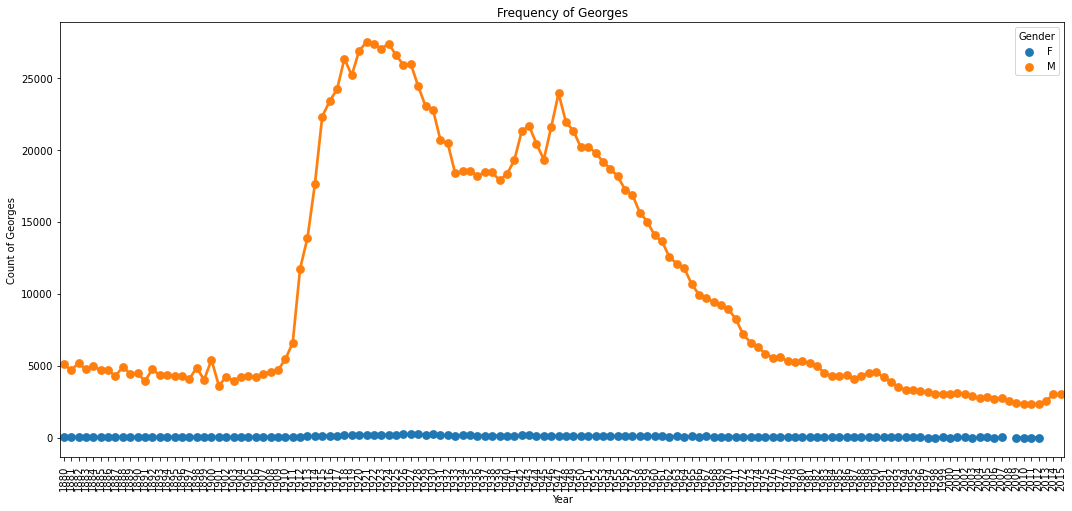

In [40]:
def count_names(name, year):
    data = pull_csv(year)
    male_result = data['Count'].loc[(data['Name'] == name) & (data['Gender'] == 'M')]
    female_result = data['Count'].loc[(data['Name'] == name) & (data['Gender'] == 'F')]
    male_count = male_result.values[0] if not male_result.empty else 0
    female_count = female_result.values[0] if not female_result.empty else 0
    return male_count, female_count

def relative_frequency(name, year):
    data = pull_csv(year)
    male_name_count, female_name_count = count_names(name, year)
    total = np.sum(data,axis=0)[2]
    return male_name_count / total, female_name_count / total

def get_historic_frequency(name, relative=False):
    data = []
    for year in range(1880, 2016):
        #get data
        df = pull_csv(year)
        df['Year'] = year
        if not relative:
            male_freq, female_freq = count_names(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        else:
            male_freq, female_freq = relative_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq    
        data.append(df.loc[(df['Name'] == name) & (df['Year'] == year),('Year', 'Name', 'Frequency', 'Gender')])
        
    data = pd.concat(data)
    return data

def plot_data(data, name='', relative=False):
    graph = plt.figure(figsize=(18, 8))
    sns.pointplot(data=data, x='Year', y='Frequency', hue='Gender')
    if not relative:
        plt.title('Frequency of '+ str(name)+'s')
        plt.ylabel('Count of ' + str(name)+'s')
    else:
        plt.title('Relative frequency of '+ str(name)+'s')
        plt.ylabel('Count of ' + str(name)+'s (% of population)')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()
    
name = input("Enter the name to analyze: ")
data = get_historic_frequency(name)
plot_data(data, name=name)

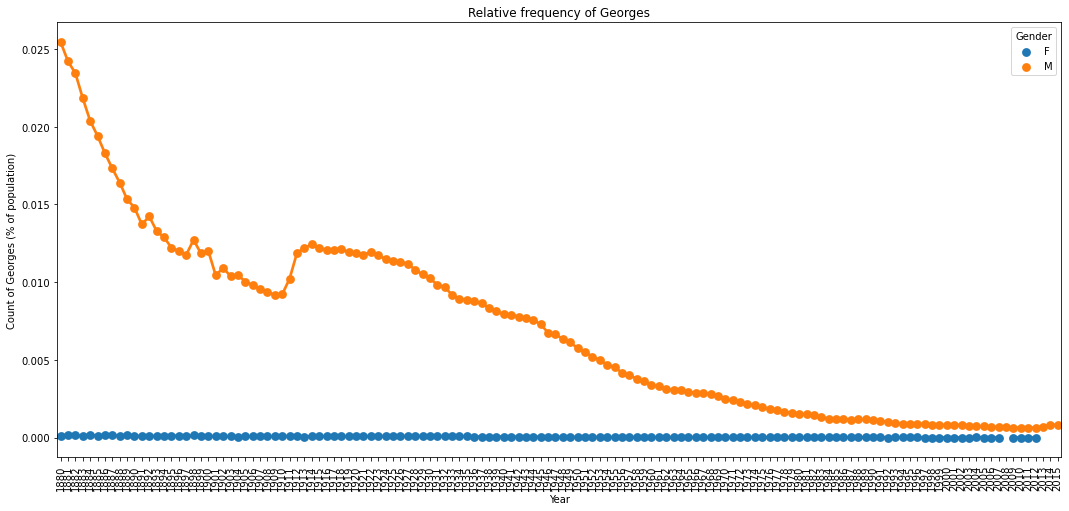

In [41]:
data = get_historic_frequency(name, relative=True)
plot_data(data, name=name, relative=True)

In [42]:
data = []
for year in range(1880,2016):
    df = pull_csv(year)
    df['Year'] = year
    data.append(df)   
data = pd.concat(data)
data["Difference"] = data["Gender"].map({'M':1,'F':-1})
data["Difference"] = data["Difference"] * data["Count"]
data = data.groupby(["Name","Year"]).sum()
data = data.reset_index().drop('Year',1)
data = data.groupby('Name').agg({'Difference':['min','max']})
data.columns = ['min', 'max']
data['Shift'] = (np.sign(data["min"] * data['max']) == -1)
data = data[data['Shift']].reset_index()

print("The following names were most popular for one gender before swapping to the other gender at least once: ")
print(data['Name'].head(15).to_string(index=False))

The following names were most popular for one gender before swapping to the other gender at least once: 
 Aalijah
  Aamari
   Aaren
  Aareon
    Aari
  Aarian
   Aarin
   Aaris
   Aarya
   Aaryn
   Aavyn
     Aba
    Abba
   Abbey
   Abell


### "The Star Wars Effect"

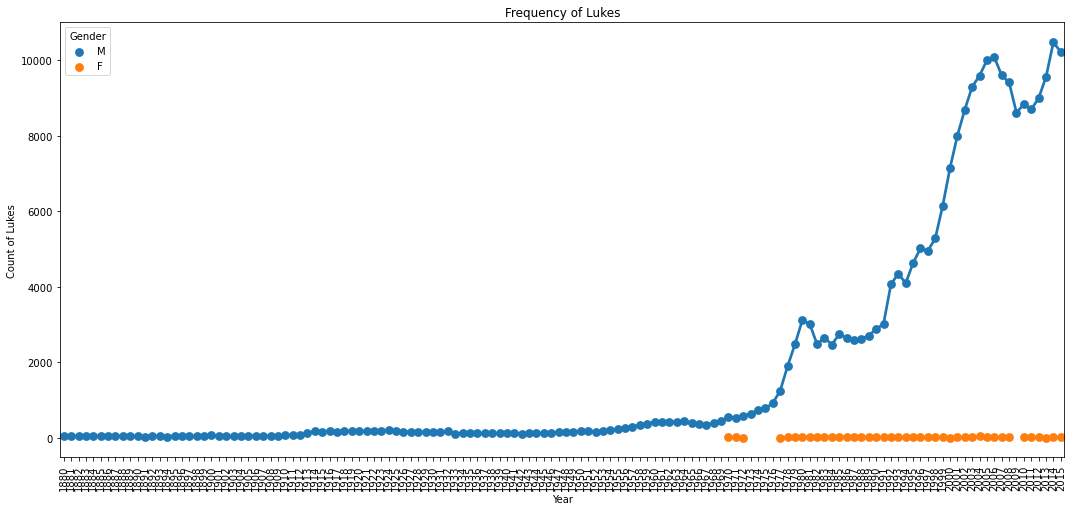

In [43]:
data = get_historic_frequency('Luke')
plot_data(data, name='Luke')

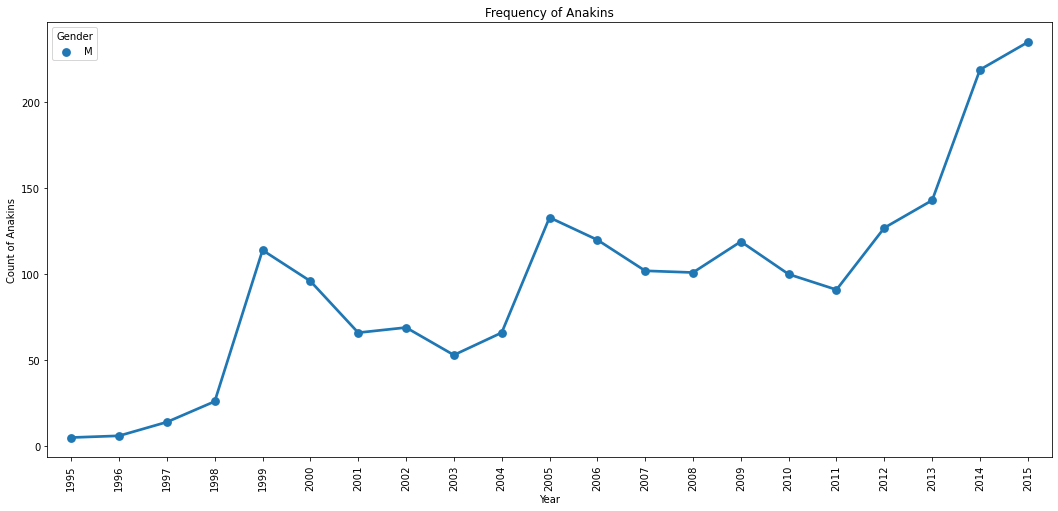

In [44]:
data = get_historic_frequency('Anakin')
plot_data(data, name='Anakin')

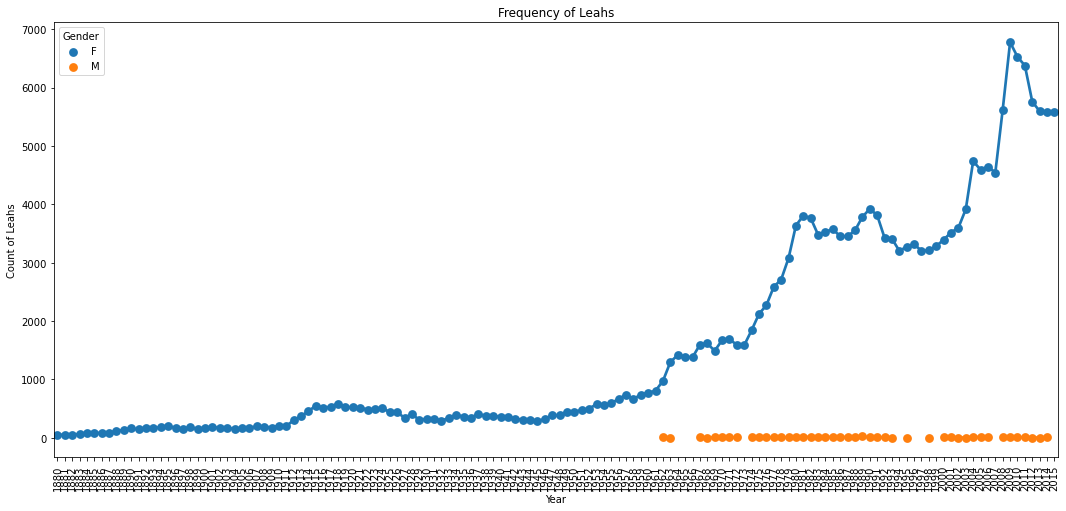

In [45]:
data = get_historic_frequency('Leah')
plot_data(data, name='Leah')

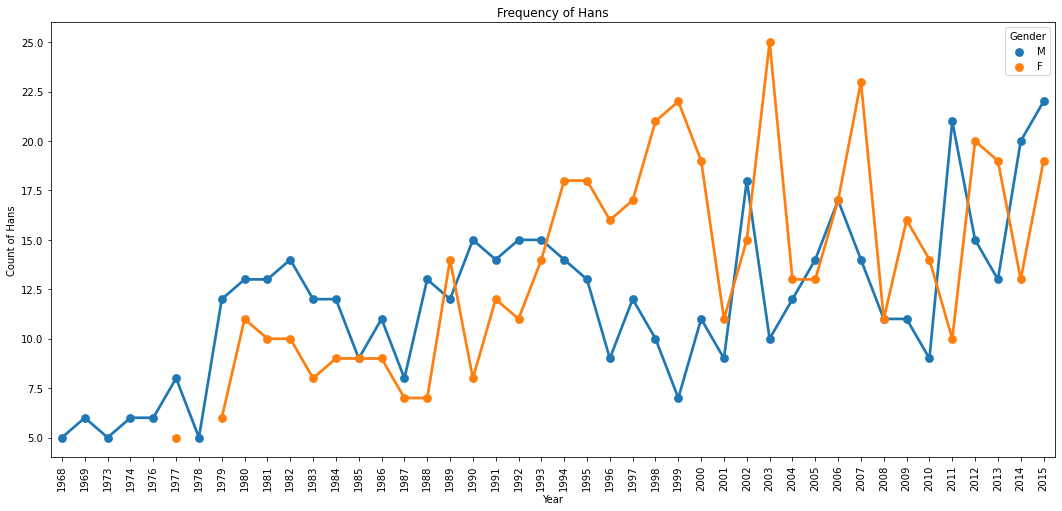

In [46]:
data = get_historic_frequency('Han')
plot_data(data, name='Han')

## Problem 4
(see the kaggle pdf)